In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Problem A: modify and rerun the model
import numpy as np
import matplotlib.pyplot as plt

# Modify the model with given paramters
M1i = 1100.0
M2i = 300.0

k12 = 0.0003
k21 = 0.1

ti = 0
tf = 100
dt = 1/365

t = np.arange(ti,tf+dt,dt) # array for t

Nt = t.size

M1 = np.zeros((Nt,))
M2 = np.zeros((Nt,))

# Repeat the "unforced" model but run the model for t = 100 years with a daily time step dt = 1/365
for i in np.arange(Nt):
    if (i==0):

        M1[i] = M1i
        M2[i] = M2i

    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1]
        dM2dt = k12*M1[i-1] - k21*M2[i-1]

        M1[i] = M1[i-1] + dM1dt*dt # Updated M1 using calculated change
        M2[i] = M2[i-1] + dM2dt*dt # Updated M2 using calculated change

# Print M1 and M2 values at the end of the simulation
print(M1[-1])
print(M2[-1])

1395.799547307703
4.200452692299009


Text(0, 0.5, 'Anthropogenic Emissions (GtC/year)')

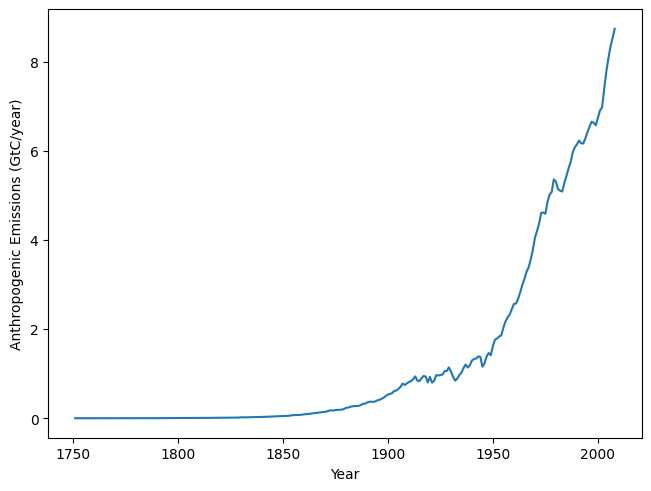

In [8]:
## Problem B: Examine impacts of human emissions

# Load the anthropogenic emissions data for 1751-2008
historical_emissions_file = '/content/drive/My Drive/Colab Notebooks/AnthropogenicEmissions.1751_2008.csv'
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)

year = data[:,0]
cflux = data[:,1]

# Plot the anthropogenic emissions data
plt.plot(year,cflux,)
plt.xlabel('Year')
plt.ylabel('Anthropogenic Emissions (GtC/year)')

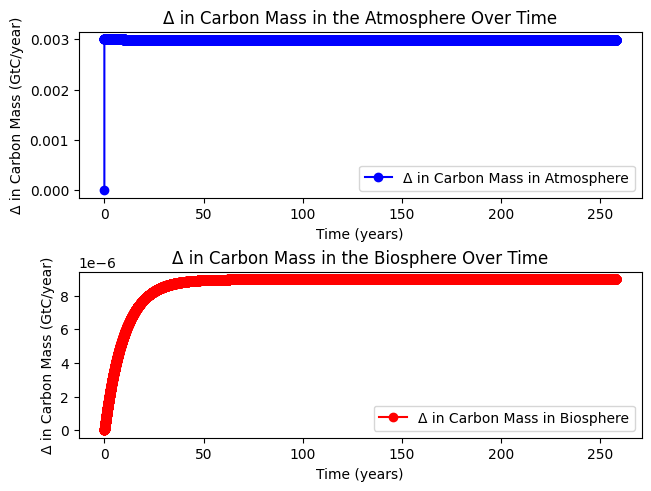

0.7717744075857862
0.0022255924151801843


In [11]:
# Modify appropriate parameters
ti=0
tf=len(year)
dt=1/365

t = np.arange(ti,tf+dt,dt) # array for t
Nt = t.size

# Create source term
emissions_interp = np.interp(t, year, cflux)

# Initialize arrays for mass of atmosphere/biosphere
M1 = np.zeros((Nt,))
M2 = np.zeros((Nt,))

# Initialize arrays for changes in mass
dM1 = np.zeros((Nt,))
dM2 = np.zeros((Nt,))

# Calculate changes in mass over time
for i in np.arange(1, Nt):
    dM1[i] = k21 * M2[i-1] - k12 * M1[i-1] + emissions_interp[i-1]  # Change in atmosphere
    dM2[i] = k12 * M1[i-1] - k21 * M2[i-1]                          # Change in biosphere

    M1[i] = M1[i-1] + dM1[i] * dt # Updated M1 using calculated change
    M2[i] = M2[i-1] + dM2[i] * dt # Updated M2 using calculated change

# Plotting changes
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.constrained_layout.use'] = True

# Plot for Change in Mass in Atmosphere
plt.subplot(2, 1, 1)
plt.plot(t, dM1, 'bo-', label='Δ in Carbon Mass in Atmosphere')
plt.xlabel('Time (years)')
plt.ylabel('Δ in Carbon Mass (GtC/year)')
plt.title('Δ in Carbon Mass in the Atmosphere Over Time')
plt.legend()

# Plot for Change in Mass in Biosphere
plt.subplot(2, 1, 2,)
plt.plot(t, dM2, 'ro-', label='Δ in Carbon Mass in Biosphere')
plt.xlabel('Time (years)')
plt.ylabel('Δ in Carbon Mass (GtC/year)')
plt.title('Δ in Carbon Mass in the Biosphere Over Time')
plt.legend()

plt.show()

print(M1[-1])
print(M2[-1])

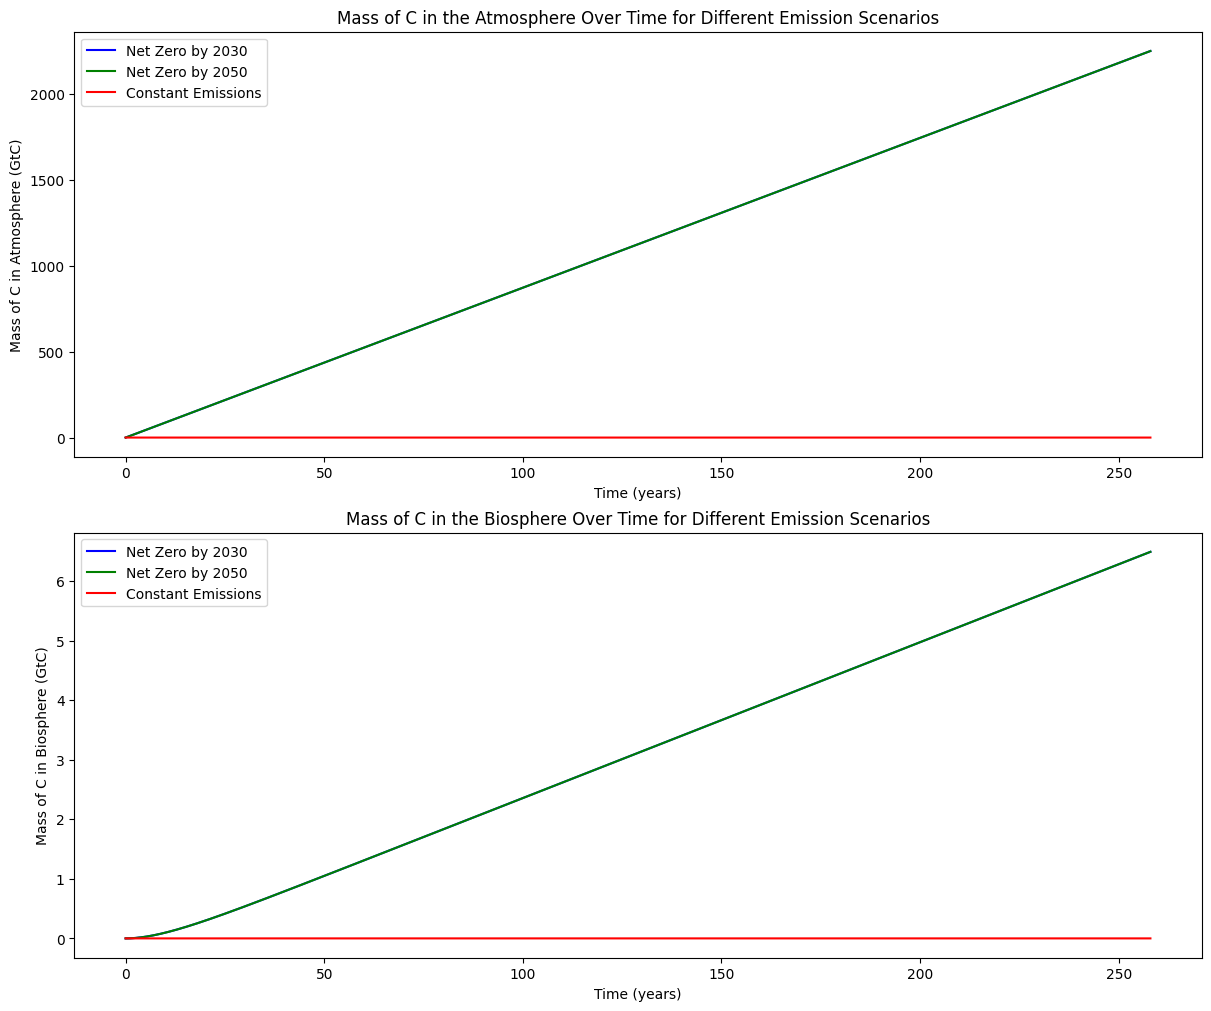

<ipython-input-17-6b06c778580e>:123: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


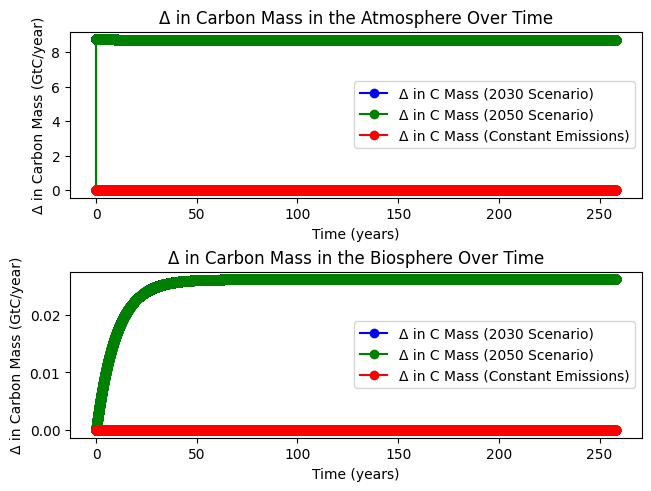

In [17]:
## Problem C: Examine the effects of mitigation

# Load the alternative emission scenarios
future_emissions_file = '/content/drive/My Drive/Colab Notebooks/EmissionsMitigationScenarios.2008_2100.csv'
data = np.loadtxt(future_emissions_file, delimiter=',', skiprows=1)

# Extract data for different scenarios
scen_year = data[:, 0]  # year data
net_zero_2030 = data[:, 1]  # net zero emissions by 2030 data
net_zero_2050 = data[:, 2]  # net zero emissions by 2050 data
constant_emissions = data[:, 3]  # constant emissions from 2008 data

# Modify appropriate parameters
ti=0
tf=len(year)
dt=1/365

t = np.arange(ti,tf+dt,dt) # array for t
Nt = t.size

# Initialize arrays for changes in mass
dM1 = np.zeros((Nt,))
dM2 = np.zeros((Nt,))

# Initialize arrays to hold the mass over time for each scenario
M1_2030 = np.zeros((Nt,))
M2_2030 = np.zeros((Nt,))
M1_2050 = np.zeros((Nt,))
M2_2050 = np.zeros((Nt,))
M1_constant = np.zeros((Nt,))
M2_constant = np.zeros((Nt,))

# Set initial conditions (final values from previous simulation)
M1_2030[0] = M1[-1]
M2_2030[0] = M2[-1]
M1_2050[0] = M1[-1]
M2_2050[0] = M2[-1]
M1_constant[0] = M1[-1]
M2_constant[0] = M2[-1]

# Create emissions array for each scenario
emissions_2030 = np.interp(t, scen_year, net_zero_2030)
emissions_2050 = np.interp(t, scen_year, net_zero_2050)
emissions_constant = np.zeros_like(t)
emissions_constant[t >= 2008] = emissions_interp[-1]  # Use last known emissions from previous simulation

# Calculate changes in mass
dM1_2030 = np.zeros((Nt,))
dM2_2030 = np.zeros((Nt,))
dM1_2050 = np.zeros((Nt,))
dM2_2050 = np.zeros((Nt,))
dM1_constant = np.zeros((Nt,))
dM2_constant = np.zeros((Nt,))

# Calculate changes for each scenario
for i in range(1, Nt):
    dM1_2030[i] = k21 * M2_2030[i-1] - k12 * M1_2030[i-1] + emissions_2030[i-1]
    dM2_2030[i] = k12 * M1_2030[i-1] - k21 * M2_2030[i-1]
    M1_2030[i] = M1_2030[i-1] + dM1_2030[i] * dt
    M2_2030[i] = M2_2030[i-1] + dM2_2030[i] * dt


    dM1_2050[i] = k21 * M2_2050[i-1] - k12 * M1_2050[i-1] + emissions_2050[i-1]
    dM2_2050[i] = k12 * M1_2050[i-1] - k21 * M2_2050[i-1]
    M1_2050[i] = M1_2050[i-1] + dM1_2050[i] * dt
    M2_2050[i] = M2_2050[i-1] + dM2_2050[i] * dt


    dM1_constant[i] = k21 * M2_constant[i-1] - k12 * M1_constant[i-1] + emissions_constant[i-1]
    dM2_constant[i] = k12 * M1_constant[i-1] - k21 * M2_constant[i-1]
    M1_constant[i] = M1_constant[i-1] + dM1_constant[i] * dt
    M2_constant[i] = M2_constant[i-1] + dM2_constant[i] * dt

# Plotting mass of C in the atmosphere/biosphere
plt.figure(figsize=(12, 10))

# Mass in atmosphere
plt.subplot(2, 1, 1)
plt.plot(t, M1_2030, label='Net Zero by 2030', color='blue')
plt.plot(t, M1_2050, label='Net Zero by 2050', color='green')
plt.plot(t, M1_constant, label='Constant Emissions', color='red')
plt.xlabel('Time (years)')
plt.ylabel('Mass of C in Atmosphere (GtC)')
plt.title('Mass of C in the Atmosphere Over Time for Different Emission Scenarios')
plt.legend()

# Mass in biosphere
plt.subplot(2, 1, 2)
plt.plot(t, M2_2030, label='Net Zero by 2030', color='blue')
plt.plot(t, M2_2050, label='Net Zero by 2050', color='green')
plt.plot(t, M2_constant, label='Constant Emissions', color='red')
plt.xlabel('Time (years)')
plt.ylabel('Mass of C in Biosphere (GtC)')
plt.title('Mass of C in the Biosphere Over Time for Different Emission Scenarios')
plt.legend()

plt.show()

# Plotting changes in mass
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.constrained_layout.use'] = True

# Change in mass in atmosphere
plt.subplot(2, 1, 1)
plt.plot(t, dM1_2030, 'bo-', label='Δ in C Mass (2030 Scenario)')
plt.plot(t, dM1_2050, 'go-', label='Δ in C Mass (2050 Scenario)')
plt.plot(t, dM1_constant, 'ro-', label='Δ in C Mass (Constant Emissions)')
plt.xlabel('Time (years)')
plt.ylabel('Δ in Carbon Mass (GtC/year)')
plt.title('Δ in Carbon Mass in the Atmosphere Over Time')
plt.legend()

# Change in mass in biosphere
plt.subplot(2, 1, 2)
plt.plot(t, dM2_2030, 'bo-', label='Δ in C Mass (2030 Scenario)')
plt.plot(t, dM2_2050, 'go-', label='Δ in C Mass (2050 Scenario)')
plt.plot(t, dM2_constant, 'ro-', label='Δ in C Mass (Constant Emissions)')
plt.xlabel('Time (years)')
plt.ylabel('Δ in Carbon Mass (GtC/year)')
plt.title('Δ in Carbon Mass in the Biosphere Over Time')
plt.legend()

plt.tight_layout()
plt.show()
